<b><font size="6">|022a|Clustering|KMC|Simple Clustering</font></b>

**Key Concepts:**
* Scatter Plots
* k-Means Clustering
* Elbow Method

In [1]:
# This is required to prevent warning from k-means in scikit-learn
# import os
# os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
import numpy as np
import pandas as pd

from IPython.display import display 

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

from yellowbrick.cluster import KElbowVisualizer

# Load data

In [3]:
df = pd.read_csv(r"./../data/SampleClusterData1.csv")

# Inspecting the data

## Viewing some rows

In [4]:
display(df.head())

,X,Y
0,160,100
1,212,86
2,198,128
3,168,76
4,194,48


## Summary of what was imported

We can summarise the DataFrame that was imported using the **df.info()** method.

In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       520 non-null    int64
 1   Y       520 non-null    int64
dtypes: int64(2)
memory usage: 8.3 KB


None

What is this telling us?

* Firstly there are 520 data entries in the dataset.
* There are 2 columns (data fields): ‘X’ and 'Y'.
* The data points are all integers.


# Exploratory Data Analysis

## Histogram Plots

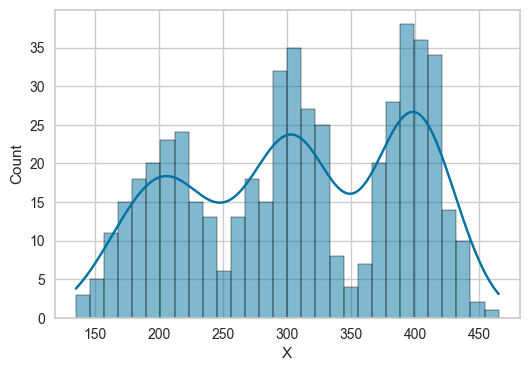

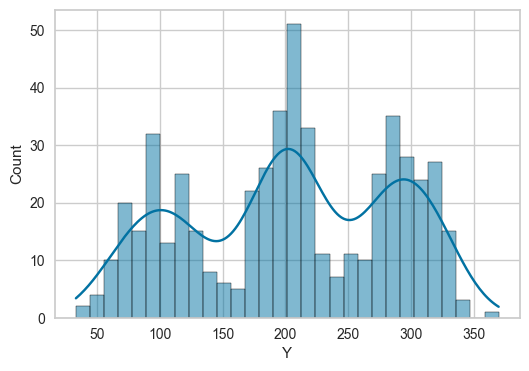

In [6]:
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.show()

## Scatter Plot

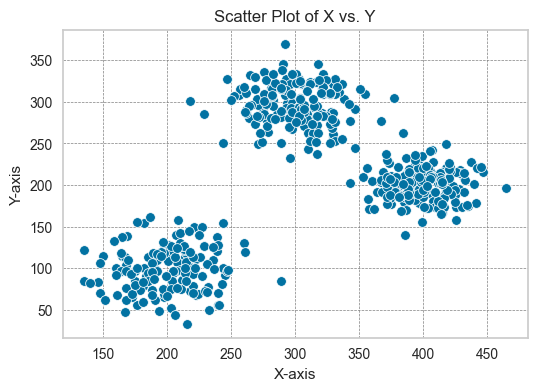

In [7]:
plt.figure(figsize=(6, 4))  #
sns.scatterplot(data=df, x="X", y="Y")

# Add labels and title 
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot of X vs. Y")

# Show the plot
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')  # Add gridlines for better readability (optional)
plt.show()

Simply by looking at the scatter plot, we can see that there are 3 obvious clusters.

## Determining Clusters

### Scatter Plots

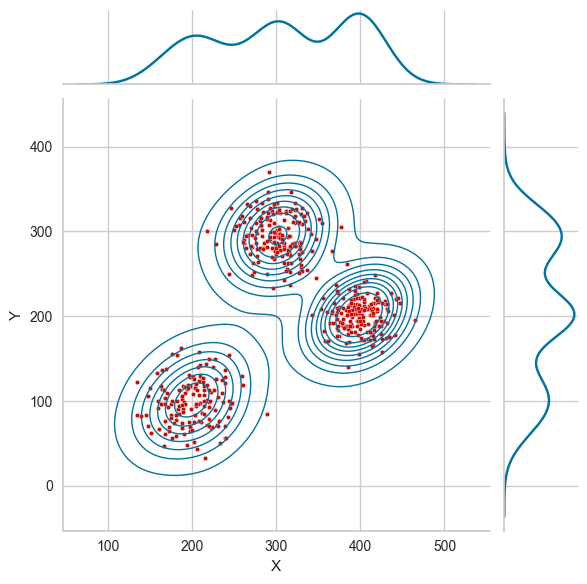

In [8]:
ax = sns.jointplot(data=df, x="X", y="Y", kind="kde", levels=10, linewidths=1)
_ = sns.scatterplot(data=df, x="X", y="Y", color = 'r', s=10)

### Elbow Curve

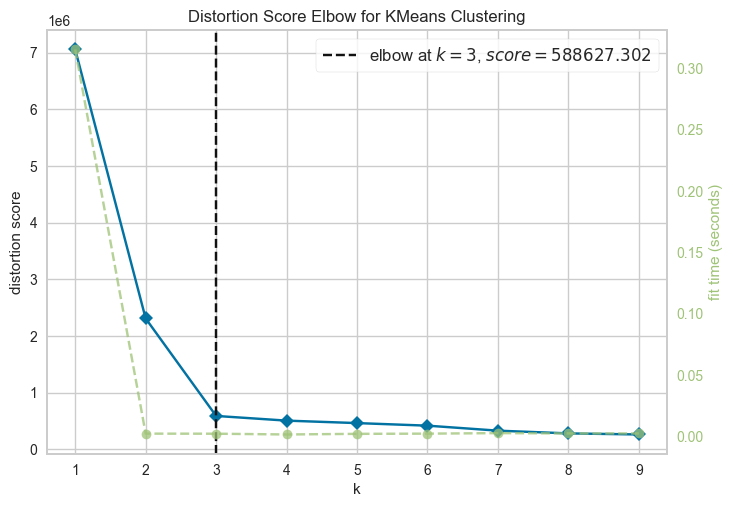

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(df)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

The elbow method indicates that there should be 3 clusters, confirming what we saw with the scatter plot.

# Model

In [10]:
k = 3
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(df)
print(clusters)
df_clusters.head(10)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

NameError: name 'df_clusters' is not defined

In [ ]:
df['Cluster'] = clusters
df.iloc[140:160, 0:3]

# Evaluate Model

## Scatter Plot

In [ ]:
palette = sns.color_palette(palette='Set1')[0:k]

In [ ]:
plt.figure(figsize=(6, 4))

sns.scatterplot(data=df_clusters, x="X", y="Y", hue="Cluster", palette=palette)
sns.color_palette(palette='Set1')
# Add labels and title 
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot of X vs. Y Showing Clusters")

# Show the plot
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

In [ ]:
plt.figure(figuresize=(6, 4)) 
sns.scatterplot(data=df)

# ax = sns.jointplot(data=df_clusters, x="X", y="Y", kind="kde", hue = "Cluster", levels=10, linewidths=1, palette=palette)
# _ = sns.scatterplot(data=df_clusters, x="X", y="Y", hue = "Cluster", palette=palette, s=10)

## Statistical Analysis

In [ ]:
for no in np.sort(df_clusters["Cluster"].unique()):
    data = df_clusters[df_clusters["Cluster"]==no].drop("Cluster", axis='columns')
    print(f'CLUSTER {no}:')
    print('  * MEAN:')
    print(f'{data.mean()}')
    print('  * STD:')
    print(f'{data.std()}')